# Face recognition using MTCNN based pytorch

In [26]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
import cv2
import matplotlib.pyplot as plt
from IPython import display

Find deviced gpu or cpu

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('detected deviced', device)

detected cpu


Load MTCNN module and set an options

If using 'keep_all' option as TRUE, It will find multiple faces. 

In [5]:
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.7, post_process=True,
    keep_all=True, device=device
)
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

Load videa and display

In [6]:
video_path = './video.mp4'
display.Video(video_path, width=640)

/Users/qot/.pyenv/versions/3.10.4/lib/python3.10/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


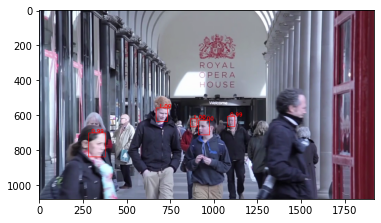

In [49]:
# Load video via Videocapture
cap = cv2.VideoCapture(video_path)

# For the test
# Capture a frame and inference pretrained model
grab, bgr_frame = cap.read()
boxes, probs = mtcnn.detect(bgr_frame)

# Draw detected face on the frame
for box, prob in zip(boxes, probs):
    box = list(map(int, box.tolist()))
    p1, p2 = map(lambda x: (x[0], x[1]), [(box[i], box[i+1]) for i in range(0, len(box), 2)])
    cv2.rectangle(bgr_frame, p1, p2, (0,0,255), 2)
    cv2.putText(bgr_frame, ' %.2f' % prob, p1, cv2.FONT_HERSHEY_DUPLEX, 1, (0,0,255), 2)

# transfrom and show
rgb_frame = bgr_frame[:,:,::-1]
plt.imshow(rgb_frame)